### Support Vector Classifer

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
## Create synthetic datapoints
from sklearn.datasets import make_classification

In [16]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [17]:
pd.DataFrame(X)

,0,1
0,-1.638449,2.027502
1,0.306767,1.018022
2,1.224895,0.984724
3,-0.565289,0.300624
4,0.888590,0.757246
...,...,...
995,-0.478045,0.139915
996,1.013513,0.805485
997,1.305337,0.774963
998,1.439251,0.705098


<Axes: xlabel='0', ylabel='1'>

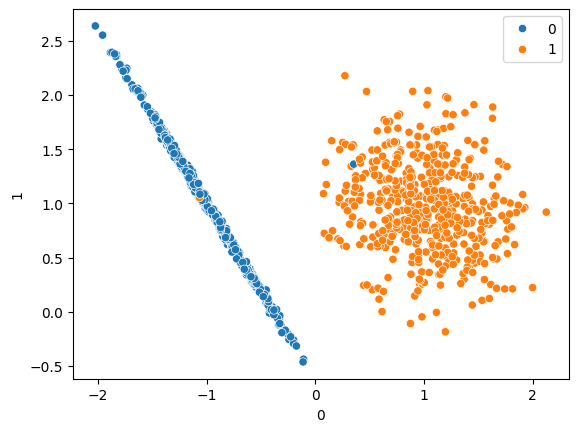

In [18]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue=y)

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC(kernel='linear')

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [24]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
## Predictions
y_pred = svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.98      1.00      0.99       130

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[118   2]
 [  0 130]]


- Here we got 99% accuracy because the datapoints are easily seperable there is no overlappings in that


**Let's try with another example**

In [94]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

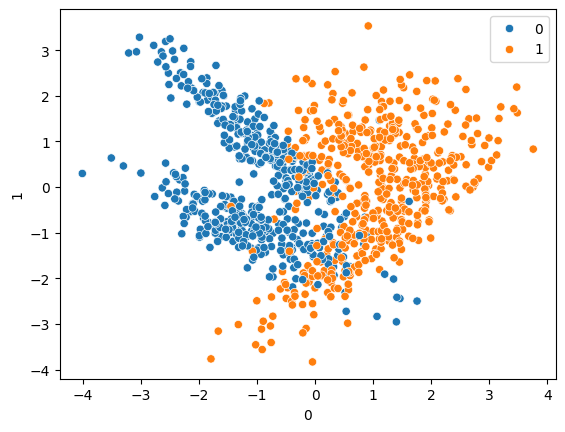

In [95]:
sns.scatterplot(x = pd.DataFrame(X)[0],y = pd.DataFrame(X)[1],hue=y)

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [97]:
svc = SVC(kernel='linear')

In [98]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [99]:
y_pred = svc.predict(X_test)

In [100]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       127
           1       0.88      0.88      0.88       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[112  15]
 [ 15 108]]


**Here the accuracy is decreased because there is some collisions in the datapoints**

##### RBF Kernel

In [101]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred = rbf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       127
           1       0.89      0.97      0.93       123

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[113  14]
 [  4 119]]


**By using this Kernel we got some better performance**

##### Polynomial Kernel

In [102]:
polynomial = SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred = polynomial.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       127
           1       0.86      0.88      0.87       123

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[110  17]
 [ 15 108]]


##### Sigmoid Kernel

In [104]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred = sigmoid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       127
           1       0.87      0.84      0.85       123

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

[[111  16]
 [ 20 103]]


In [48]:
precomputed = SVC(kernel='precomputed')
precomputed.fit(X_train,y_train)
y_pred = precomputed.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

ValueError: Precomputed matrix must be a square matrix. Input is a 750x2 matrix.

#### Hyper-Parameter Tuning

In [105]:
from sklearn.model_selection import GridSearchCV

## defining parameter range
params_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']  #['rbf','linear','polynomial'] here we are using RBF cuz it is giving better accuracy
}

In [106]:
grid = GridSearchCV(SVC(),param_grid=params_grid,cv=5,verbose=3,refit=True)

In [107]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [108]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [109]:
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       127
           1       0.90      0.96      0.93       123

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[114  13]
 [  5 118]]


**By Hyper Parameter tuning we get some more better result**